### 参照設定

In [1]:
#r "nuget:Microsoft.Data.Sqlite,8.0.3"
#r "nuget:Skender.Stock.Indicators,2.5.0"
#r "nuget:ccxt,4.2.85"
#r "nuget:ScottPlot,5.0.30"
#r "nuget:ReactiveProperty,9.5.0"
#r "nuget:SkiaSharp.NativeAssets.Linux.NoDependencies"
#r "/workspace/src/Common/obj/Debug/net8.0/Common.dll"
#r "/workspace/src/Domain/obj/Debug/net8.0/Domain.dll"
#r "/workspace/src/Infra/obj/Debug/net8.0/Infra.dll"

using BotTrade.Infra;
using BotTrade.Infra.Exchanges;
using BotTrade.Domain;
using BotTrade.Domain.Strategies;
using ScottPlot;
using Microsoft.DotNet.Interactive.Formatting;


Installed Packages ccxt, 4.2.85 Microsoft.Data.Sqlite, 8.0.3 ReactiveProperty, 9.5.0 ScottPlot, 5.0.30 Skender.Stock.Indicators, 2.5.0 SkiaSharp.NativeAssets.Linux.NoDependencies, 2.88.8

Loading extensions from `/root/.nuget/packages/skiasharp/2.88.8/interactive-extensions/dotnet/SkiaSharp.DotNet.Interactive.dll`

### formatの設定
chart画像の大きさ設定もここ

In [2]:
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetImageHtml(1600, 1200)), HtmlFormatter.MimeType);


### パラメータ設定

In [3]:
var setting = new Setting.Bot()
{
    Capital = 100,
    Exchange = new Setting.Exchange()
    {
        Place = ExchangePlace.Bybit,
        Symbol = Symbol.Spot_BTCUSDT,
    },
    Strategies = 
    [
        new Setting.Strategy() 
        {
            Kind = StrategyKind.MACross,
            Timeframe = Timeframe.FiveMinute,
            Parameters = [ 10, 50 ],
        },
    ],
};



### Bot稼働

In [4]:

var factory = new BotFactory();
var bot = factory.Create(setting);
bot.Start();


info: BotTrade.Domain.Bot[0]
      Bot start at [MACross(10, 50)] from 100 in Bybit_BTC/USDT_5m


### chartの描画


##### 分析チャート
{
    1: ロウソク足
    2: 取引高
    3~: ユーザ定義
}


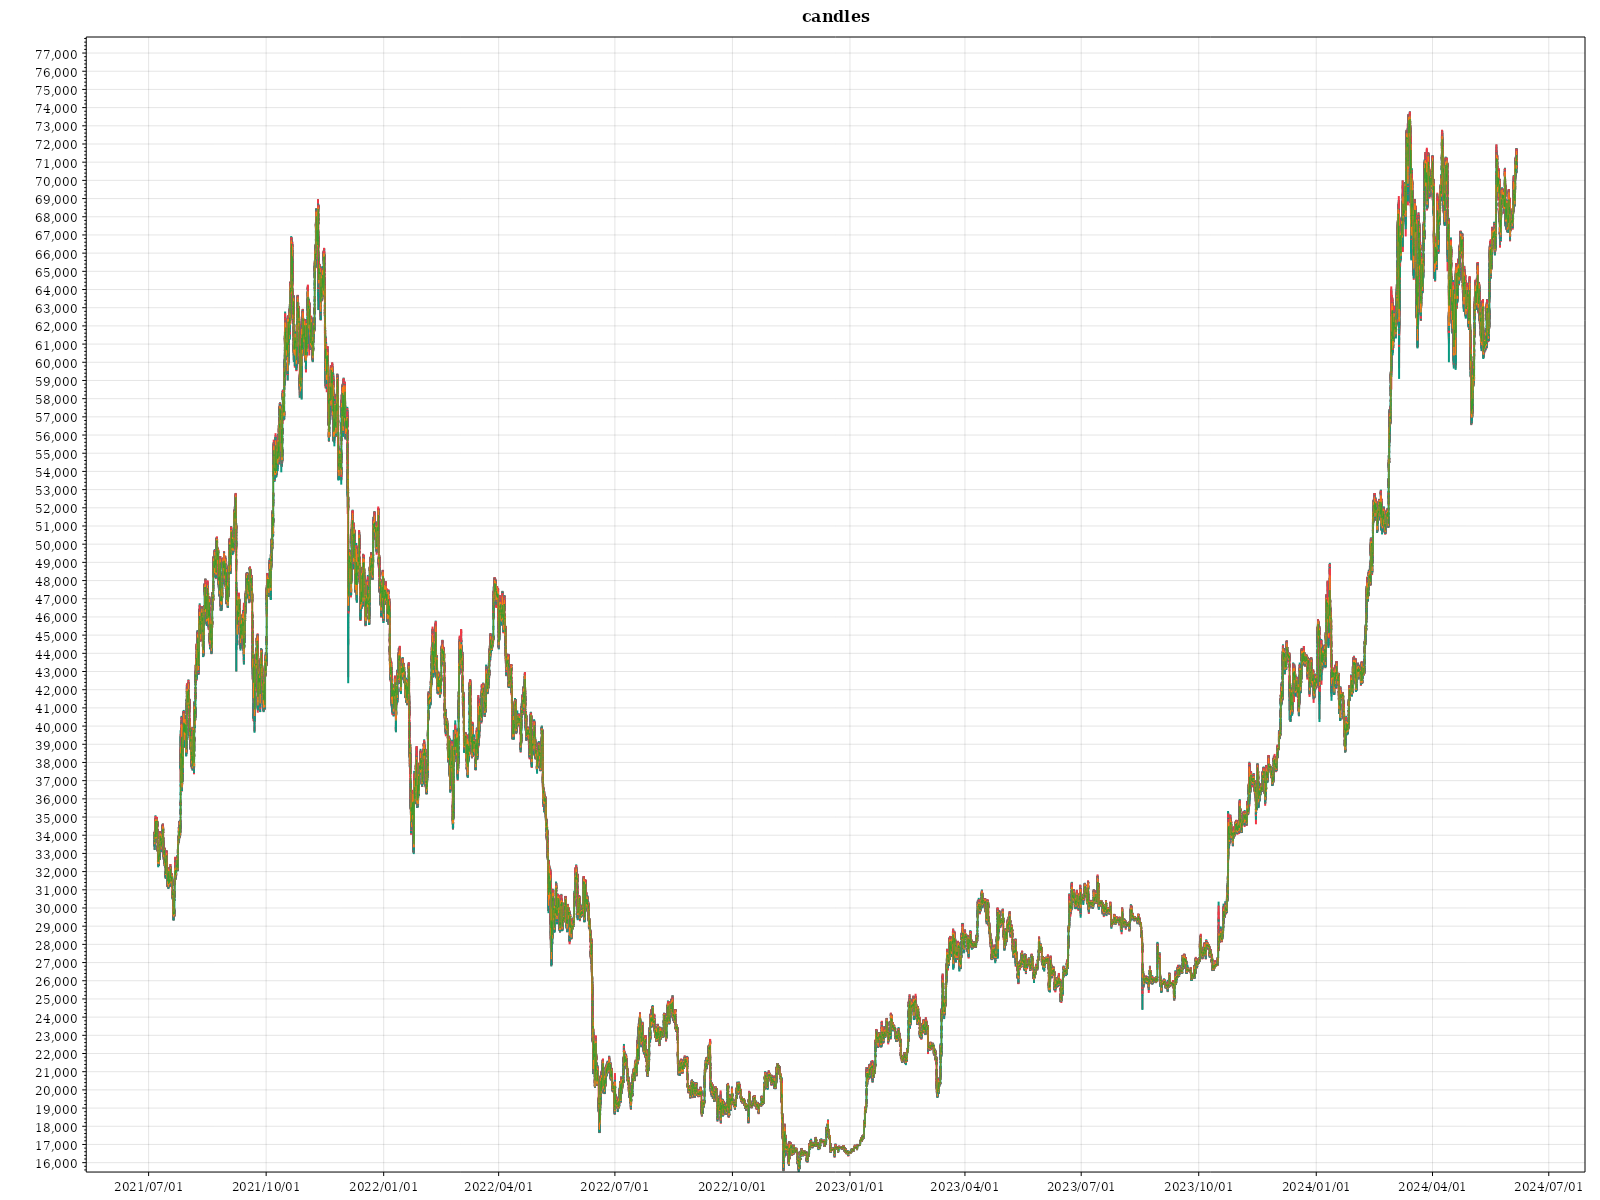


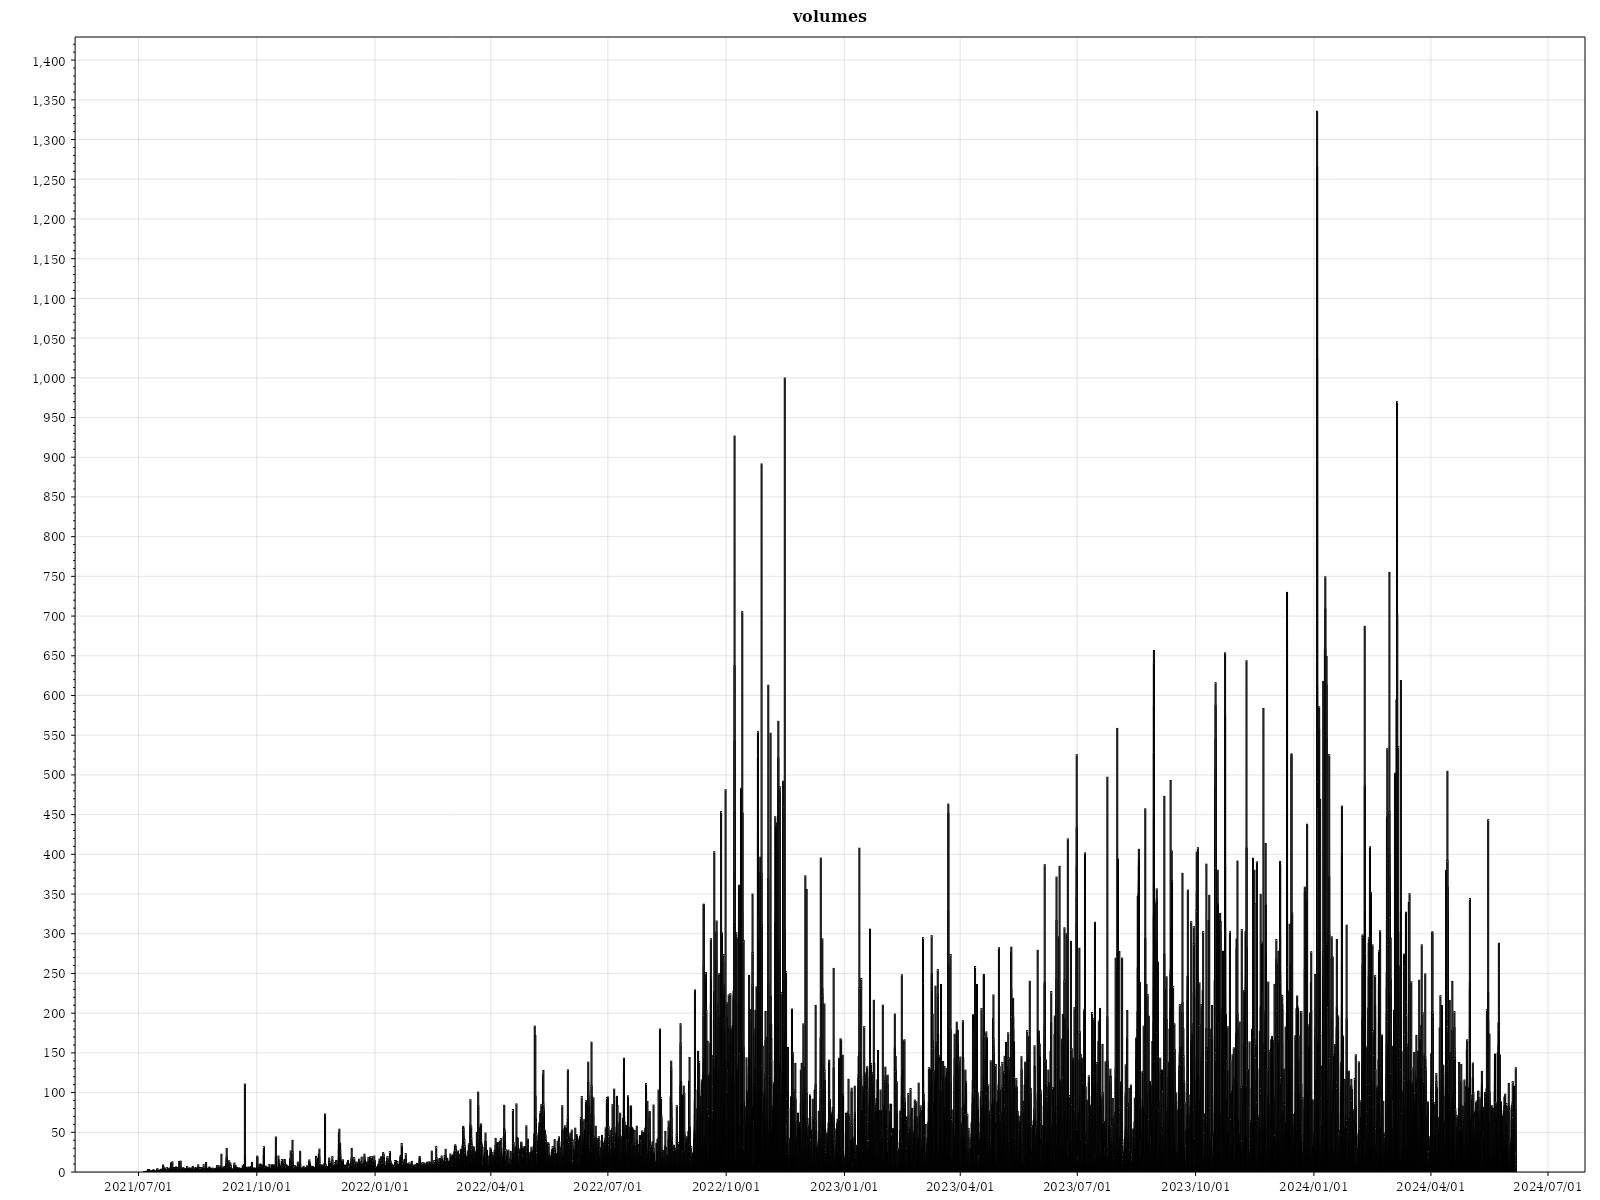

In [5]:
var charts = bot.ChartMaker?.Output();
foreach(var chart in charts)
{
    chart.Display();
}


#### バックテスト結果


BotTrade.Domain.StrategyReport Trades index value 0 BotTrade.Domain.Position Id 292f004f-d860-41cb-820b-1135047bc531 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 33643.13 EntryAt 2021-07-05 17:14:00Z Exit 34095.1 ExitAt 2021-07-05 21:14:00Z Status Close Profit 4.51970 1 BotTrade.Domain.Position Id cdfaca38-be1f-4c4a-82d7-5428cb3b7cea Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 33896.01 EntryAt 2021-07-06 01:24:00Z Exit 34160.63 ExitAt 2021-07-06 09:25:00Z Status Close Profit 2.64620 2 BotTrade.Domain.Position Id d33c683e-af2e-4b52-83e9-9f654eb45c28 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 34364.75 EntryAt 2021-07-06 12:55:00Z Exit 33845.19 ExitAt 2021-07-06 19:06:00Z Status Close Profit -5.19560 3 BotTrade.Domain.Position Id 6dfa9056-aae6-4cc3-ac47-20b07e2f367d Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 34066.83 EntryAt 2021-07-07 02:26:00Z Exit 34082.09 ExitAt 2021-07-07 02:36:00Z Status Close Profit 0.15260 4 BotTrade.Domain.Position Id 8bcd72ab-f815-40c2-b981-bb355ad0671c Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 34289.02 EntryAt 2021-07-07 03:16:00Z Exit 34655.49 ExitAt 2021-07-07 09:16:00Z Status Close Profit 3.66470 5 BotTrade.Domain.Position Id 0c82c58c-8070-4c76-9894-51ab1aece2dd Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 34911.15 EntryAt 2021-07-07 11:37:00Z Exit 34745.66 ExitAt 2021-07-07 13:37:00Z Status Close Profit -1.65490 6 BotTrade.Domain.Position Id 4cea74f1-e508-41d5-8805-cde5ce3b3be4 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 34548.09 EntryAt 2021-07-07 20:07:00Z Exit 33112.46 ExitAt 2021-07-08 06:58:00Z Status Close Profit -14.35630 7 BotTrade.Domain.Position Id 608fb791-59b2-4e89-8bcb-9f718a4b8186 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 32406.43 EntryAt 2021-07-08 13:38:00Z Exit 32841.2 ExitAt 2021-07-08 18:48:00Z Status Close Profit 4.34770 8 BotTrade.Domain.Position Id 5352d779-7fdd-40fb-a808-75b6e91a3949 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 32908.0 EntryAt 2021-07-08 21:09:00Z Exit 32804.31 ExitAt 2021-07-08 21:19:00Z Status Close Profit -1.03690 9 BotTrade.Domain.Position Id 8e0b5c7c-03d3-4aa8-a93d-9b55130c8230 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 32862.27 EntryAt 2021-07-08 21:49:00Z Exit 32892.17 ExitAt 2021-07-08 23:59:00Z Status Close Profit 0.29900 10 BotTrade.Domain.Position Id ffd498b2-967b-4e6d-8fde-f9cb3c8a382a Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 32615.79 EntryAt 2021-07-09 00:39:00Z Exit 32760.75 ExitAt 2021-07-09 02:19:00Z Status Close Profit 1.44960 11 BotTrade.Domain.Position Id 2810f340-7418-4e32-9d6c-e78f43da47c0 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 32860.0 EntryAt 2021-07-09 06:29:00Z Exit 32925.0 ExitAt 2021-07-09 09:39:00Z Status Close Profit 0.6500 12 BotTrade.Domain.Position Id ccb09e25-0125-4aa2-8805-2d2fdafa6bec Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 33738.75 EntryAt 2021-07-10 07:41:00Z Exit 33757.92 ExitAt 2021-07-10 07:51:00Z Status Close Profit 0.19170 13 BotTrade.Domain.Position Id 7cf2c821-b204-4222-9d3b-a134b1486f4f Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 33695.4 EntryAt 2021-07-10 14:01:00Z Exit 33836.69 ExitAt 2021-07-10 15:11:00Z Status Close Profit 1.41290 14 BotTrade.Domain.Position Id 8601985a-2854-4dae-98eb-5056a41fc74f Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 33415.59 EntryAt 2021-07-10 17:31:00Z Exit 33468.09 ExitAt 2021-07-10 22:01:00Z Status Close Profit 0.52500 15 BotTrade.Domain.Position Id 19122ea5-f729-4dfe-b90b-cece5d9b1a85 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 33578.19 EntryAt 2021-07-11 02:32:00Z Exit 33620.82 ExitAt 2021-07-11 05:42:00Z Status Close Profit 0.42630 16 BotTrade.Domain.Position Id fe6c7b4e-6784-4410-8ba3-76cc88bade72 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 33844.71 EntryAt 2021-07-11 13:42:00Z Exit 33871.49 ExitAt 2021-07-11 18:13:00Z Status Close Profit 0.26780 17 BotTrade.Domain.Position Id 4b4a632d-f694-49ae-b2d9-c398a2d72f99 Symbol Spot_BTCUSDT Type Long Quantity 0.01 Entry 33
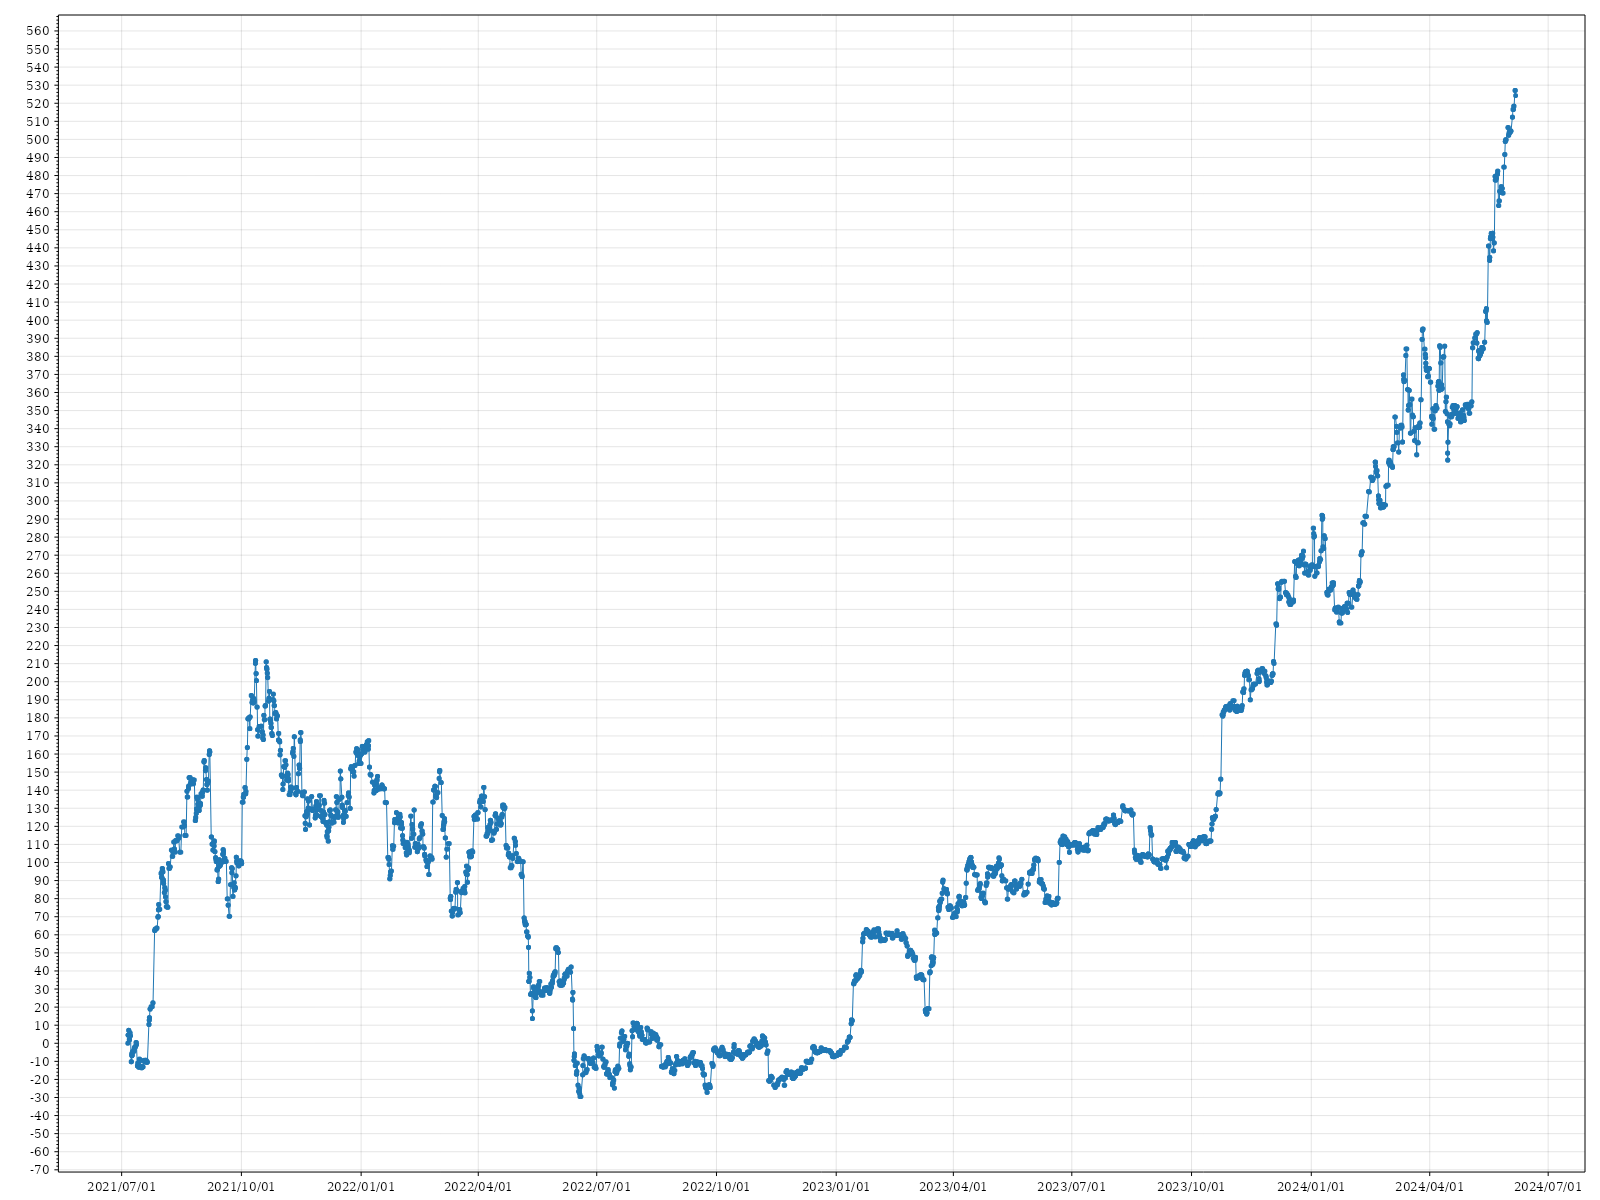

In [6]:
var report = bot.Reporter.Report();
report?.Display();
